In [1]:
#Import necessary packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

#lux - eda
#!pip install lux 
import lux

from sklearn.preprocessing import MinMaxScaler

In [2]:
os.getcwd()

'C:\\Users\\Jasmine Jena\\Desktop\\Learnbay\\Projects\\Health Care Analytics\\Parkinson Disease'

# Load the Dataset

In [3]:
df = pd.read_csv('parkinsons.data')
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [4]:
#!pip install --upgrade lux-api


In [5]:
df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [6]:
pd.pandas.set_option('display.max_columns', None)

In [7]:
#Find null value in the dataset
df.isnull().sum()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [8]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object


In [9]:
df['status'].value_counts() #dependent variable

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [10]:
#Finding the unique values from the dataset

for i in df.columns:
    print('*********************************************',i,'***************************************')
    print()
    print(set(df[i].tolist()))#unique values
    print()

********************************************* name ***************************************

{'phon_R01_S26_5', 'phon_R01_S24_1', 'phon_R01_S26_4', 'phon_R01_S04_4', 'phon_R01_S22_4', 'phon_R01_S04_2', 'phon_R01_S08_2', 'phon_R01_S35_3', 'phon_R01_S35_6', 'phon_R01_S34_1', 'phon_R01_S04_3', 'phon_R01_S10_3', 'phon_R01_S18_3', 'phon_R01_S50_3', 'phon_R01_S32_4', 'phon_R01_S20_2', 'phon_R01_S02_4', 'phon_R01_S06_5', 'phon_R01_S25_2', 'phon_R01_S32_6', 'phon_R01_S22_3', 'phon_R01_S02_2', 'phon_R01_S10_1', 'phon_R01_S27_7', 'phon_R01_S42_6', 'phon_R01_S33_4', 'phon_R01_S21_6', 'phon_R01_S02_5', 'phon_R01_S37_2', 'phon_R01_S35_7', 'phon_R01_S32_1', 'phon_R01_S17_5', 'phon_R01_S01_2', 'phon_R01_S10_5', 'phon_R01_S26_6', 'phon_R01_S10_4', 'phon_R01_S10_6', 'phon_R01_S27_4', 'phon_R01_S26_1', 'phon_R01_S27_2', 'phon_R01_S20_5', 'phon_R01_S13_2', 'phon_R01_S08_1', 'phon_R01_S25_3', 'phon_R01_S25_4', 'phon_R01_S27_5', 'phon_R01_S07_5', 'phon_R01_S10_2', 'phon_R01_S24_2', 'phon_R01_S34_6', 'phon_R

Axes(0.125,0.11;0.775x0.77)


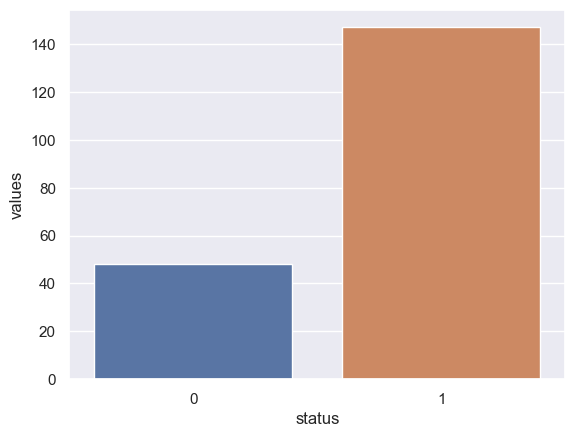

In [11]:
temp = df['status'].value_counts()
temp_df = pd.DataFrame({'status': temp.index, 'values':temp.values})
print(sns.barplot(x='status', y='values', data=temp_df))

In [12]:
#its an imbalanced dataset

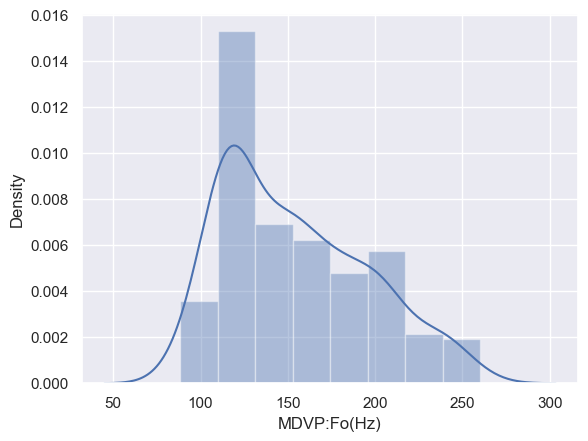

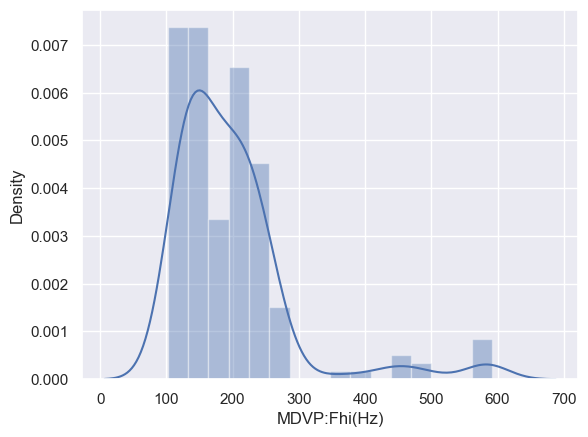

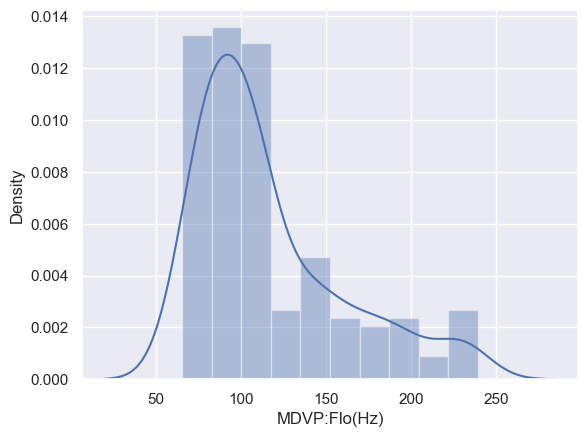

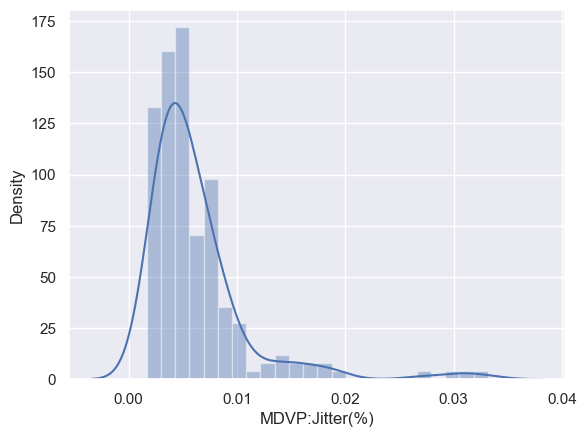

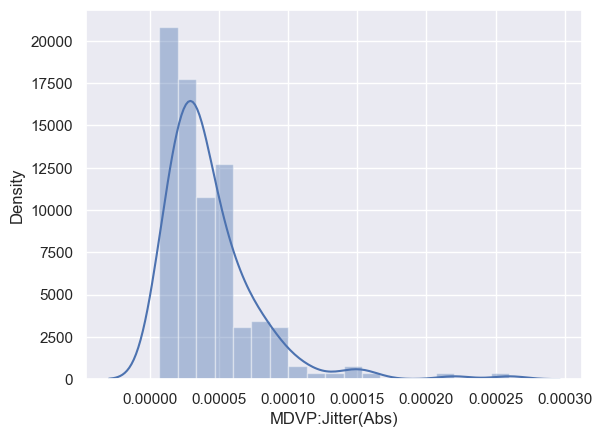

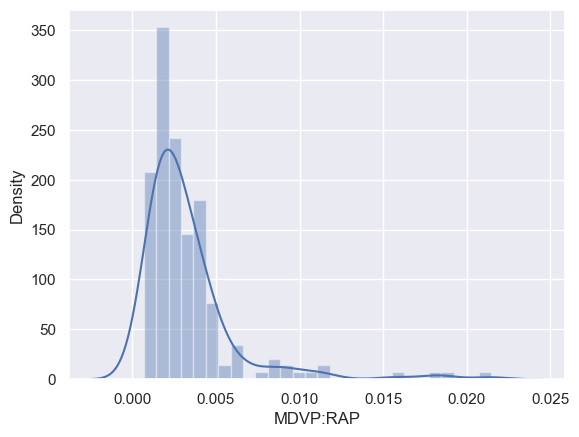

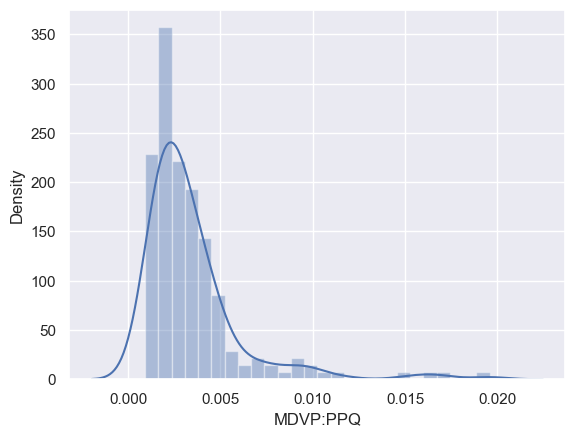

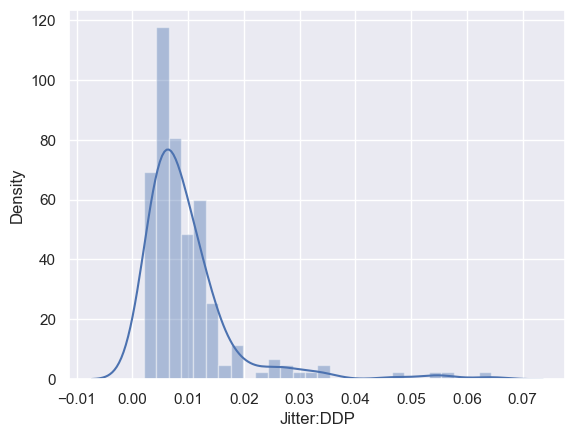

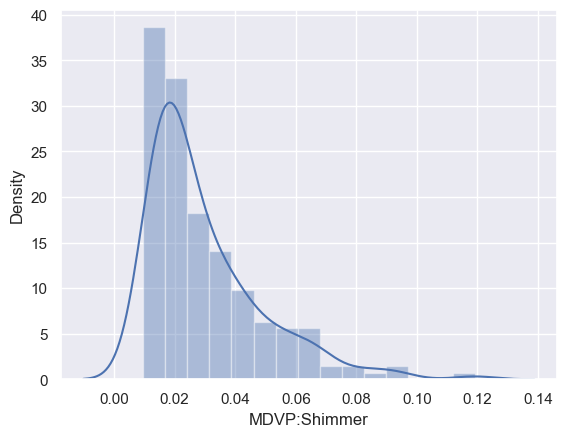

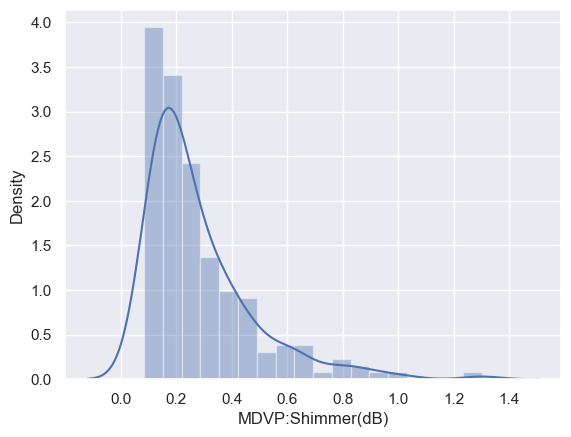

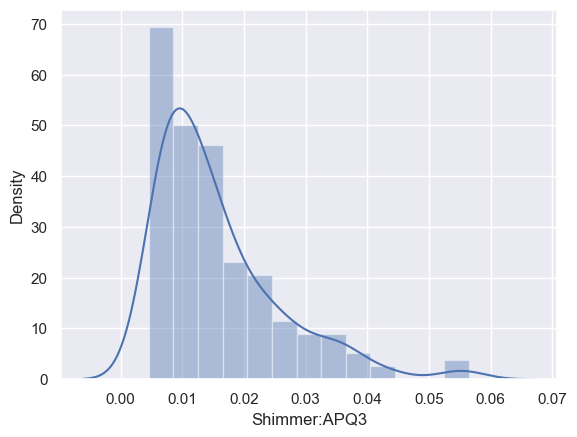

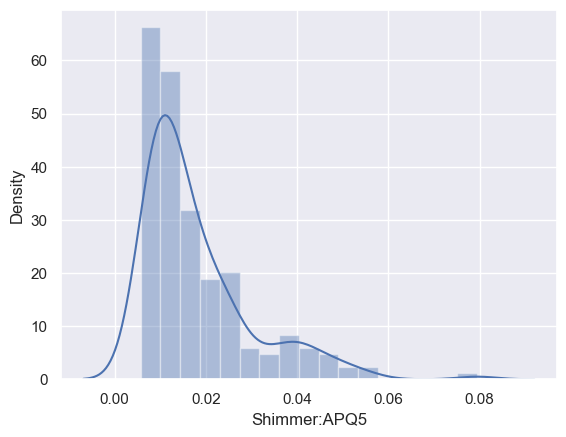

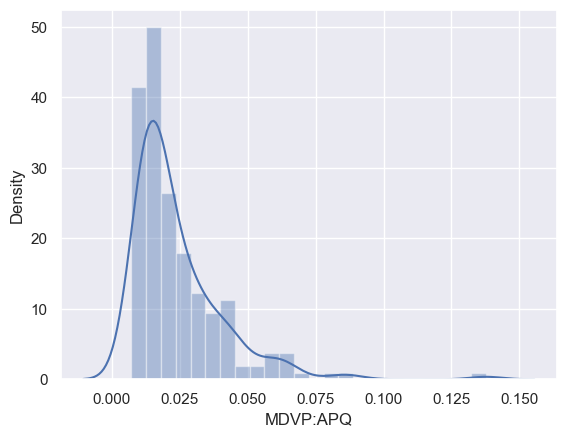

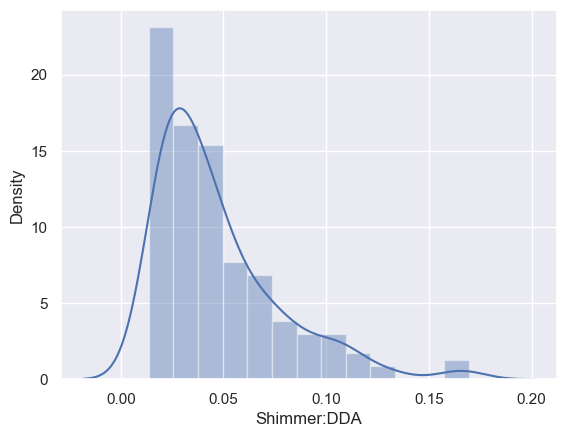

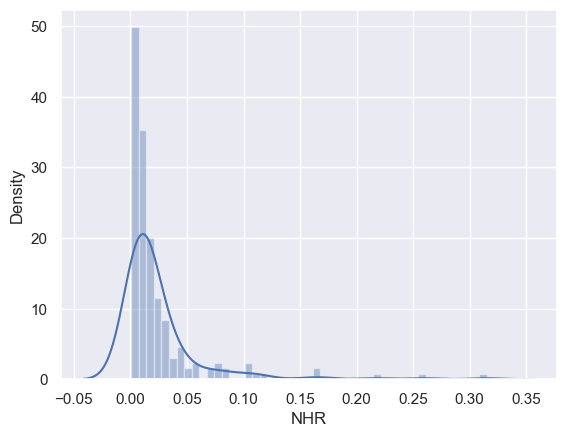

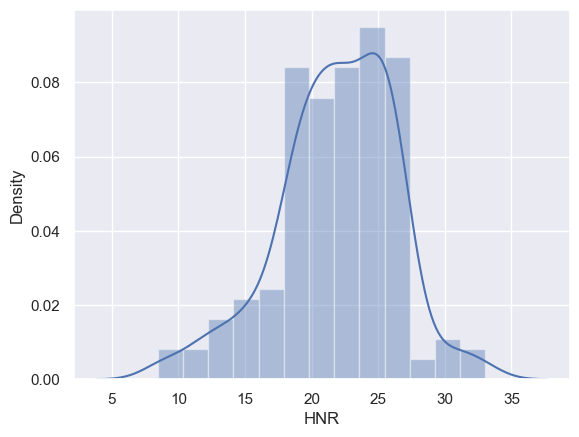

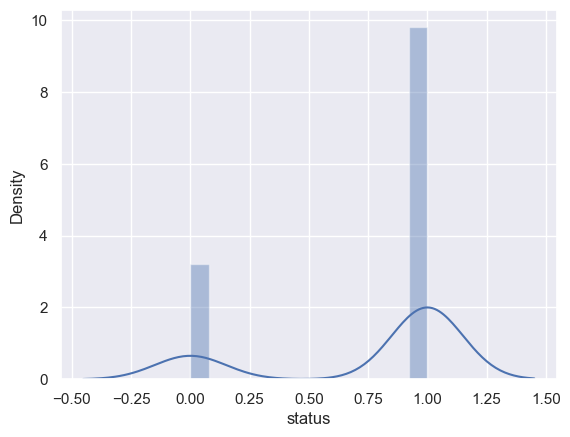

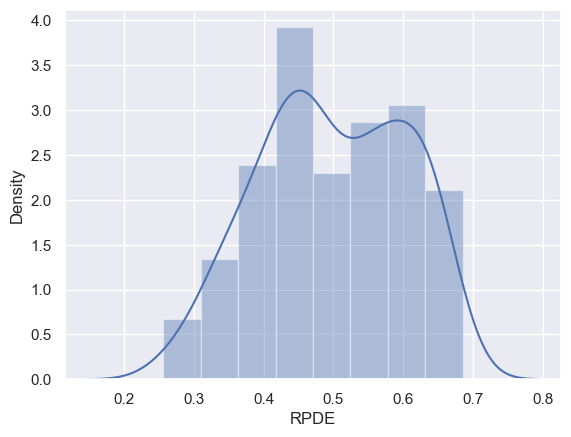

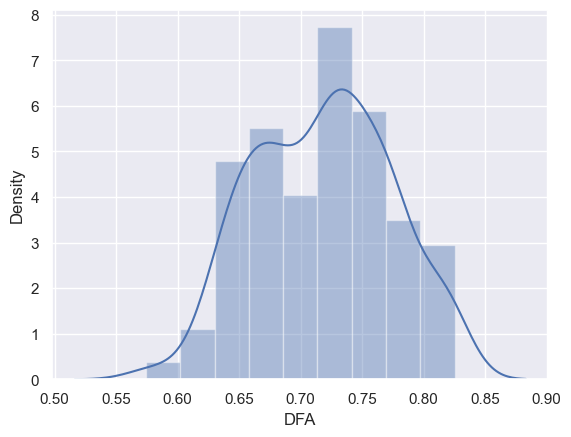

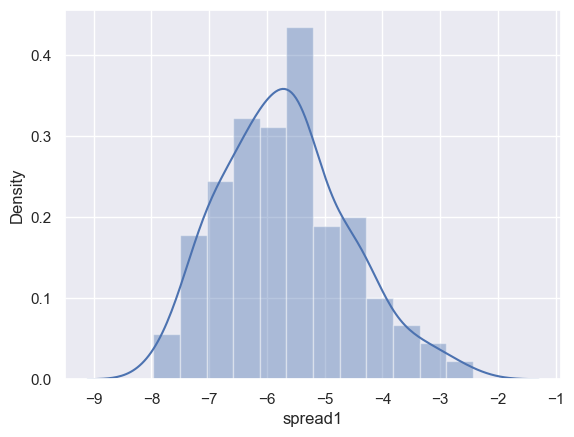

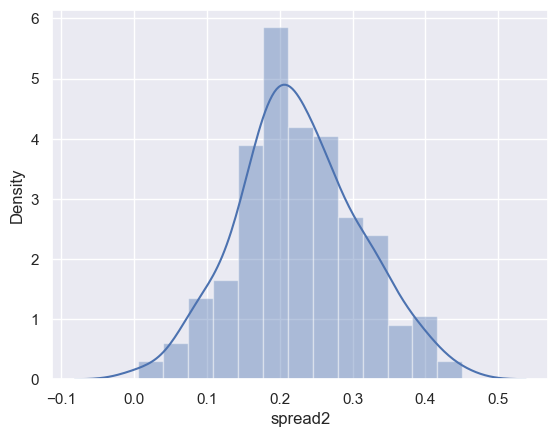

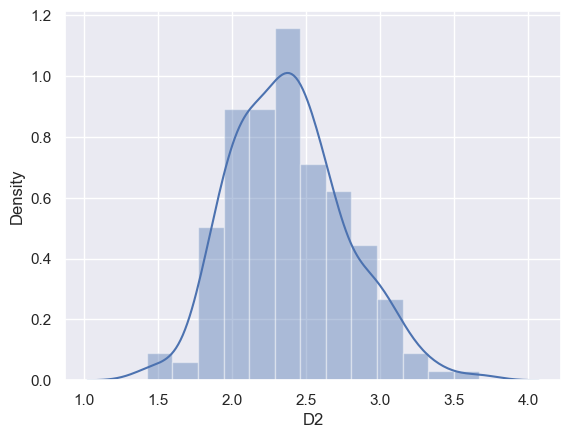

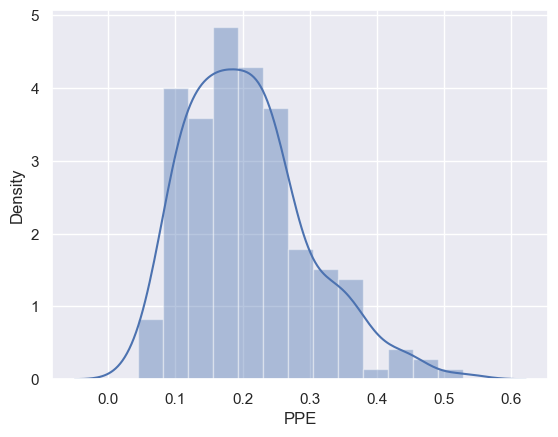

In [13]:
#Find the distribution of the data

def distplots(col):
    sns.distplot(df[col])
    plt.show()
    
for i in list(df.columns)[1:]:
    distplots(i)

### there's right skewness means there's outlier because the one who have disease, their param value exceeds or undermines the normal range
### in clinical sector we are not supposed to treat outlier, because these are valuable data and who lies in outlier they need attention

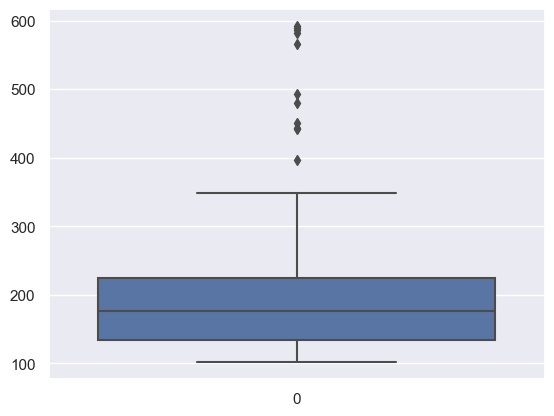

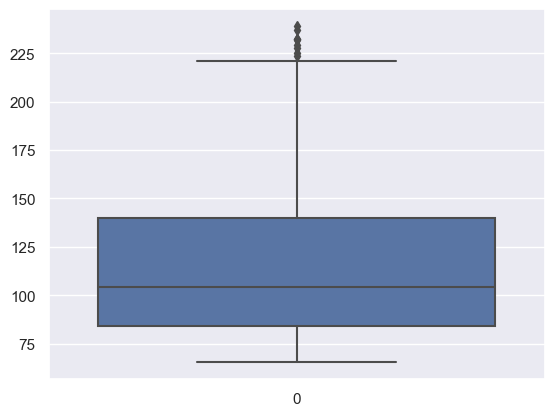

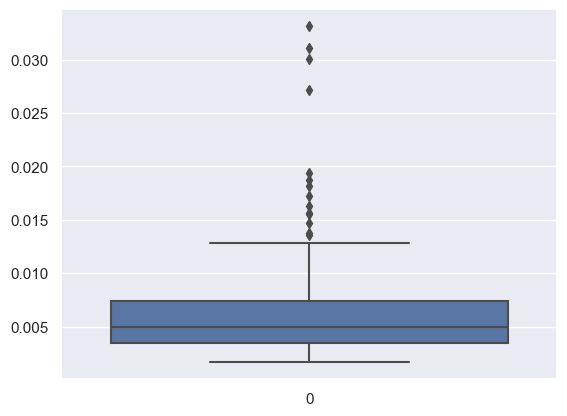

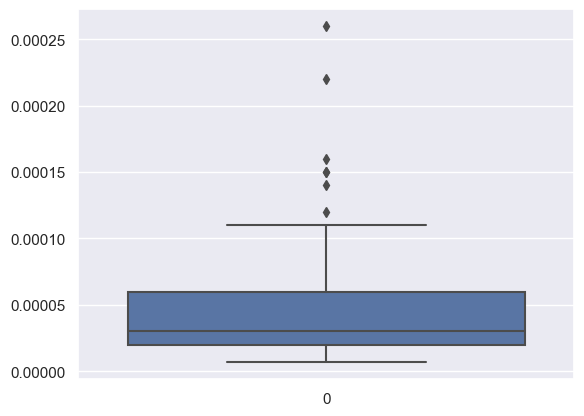

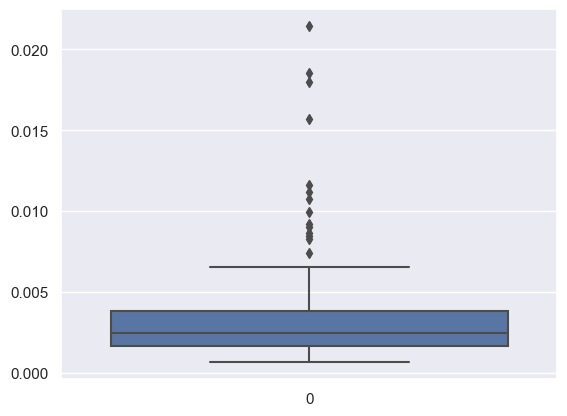

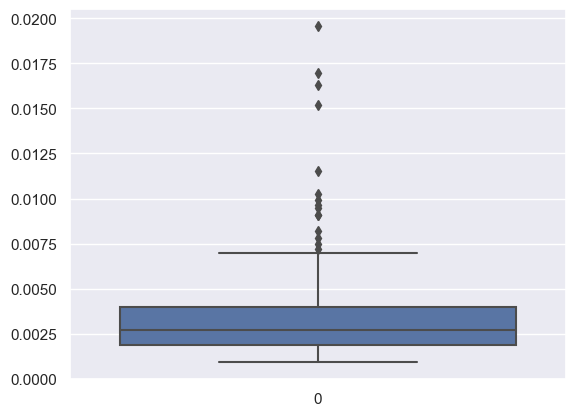

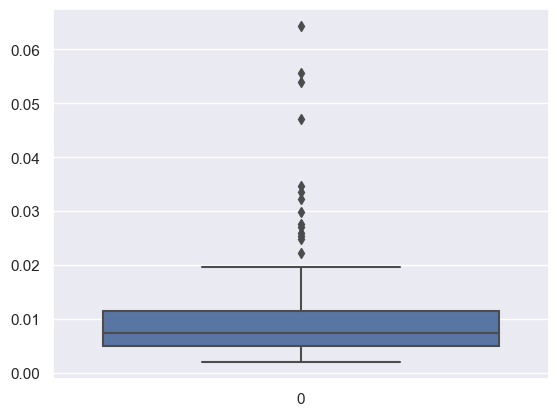

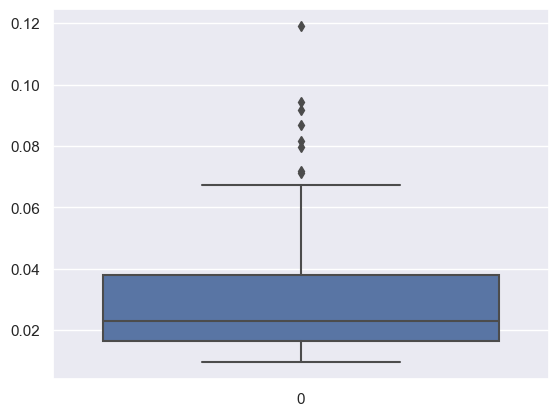

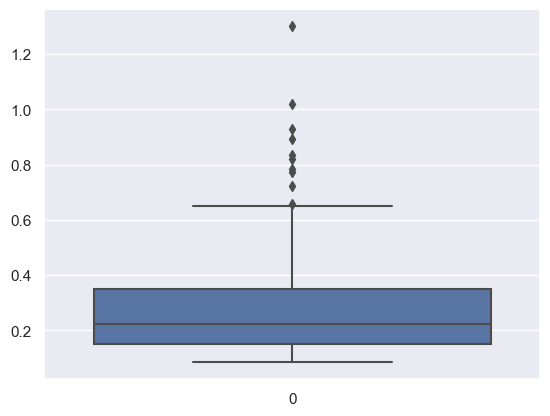

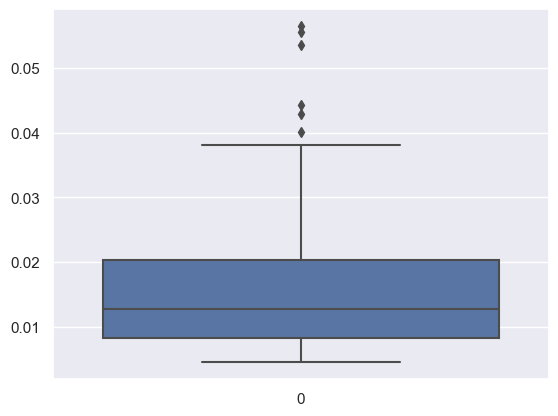

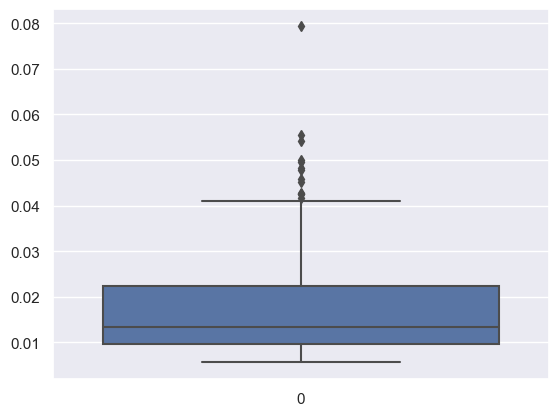

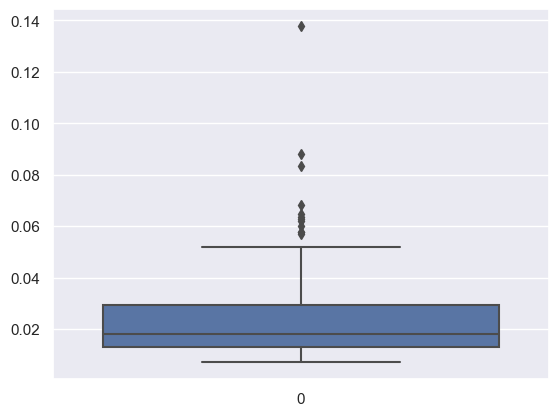

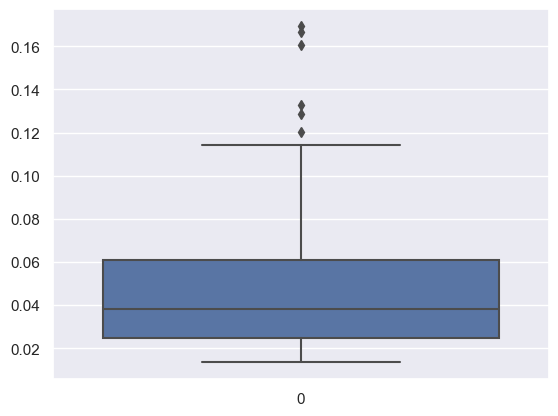

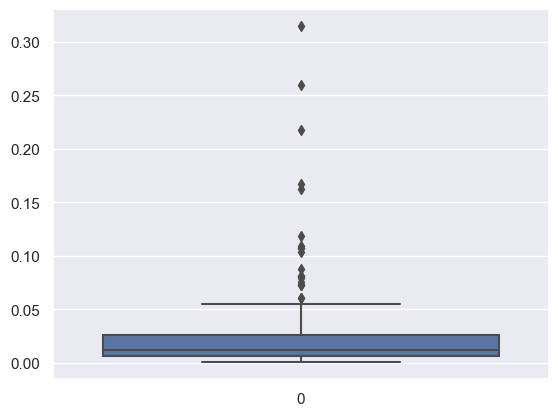

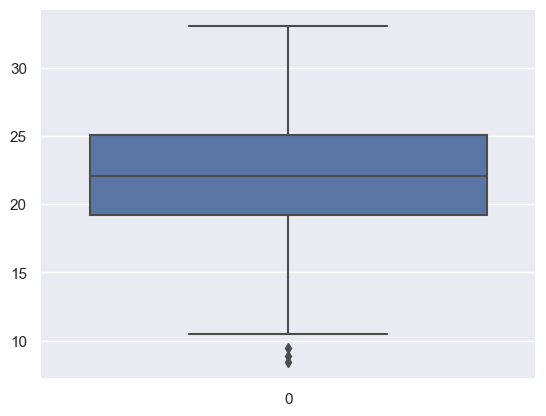

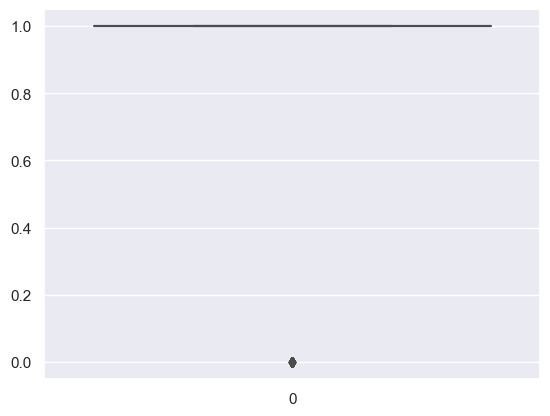

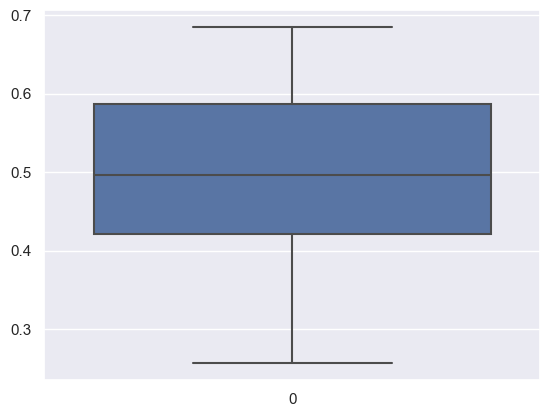

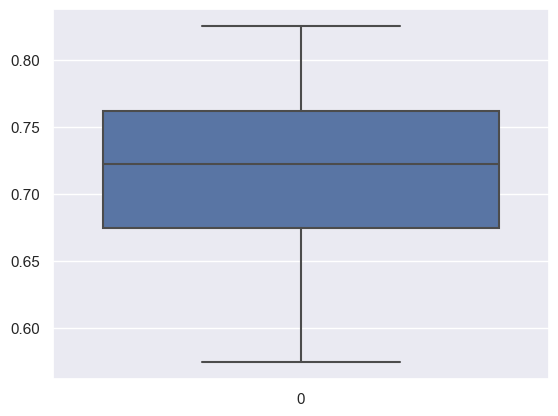

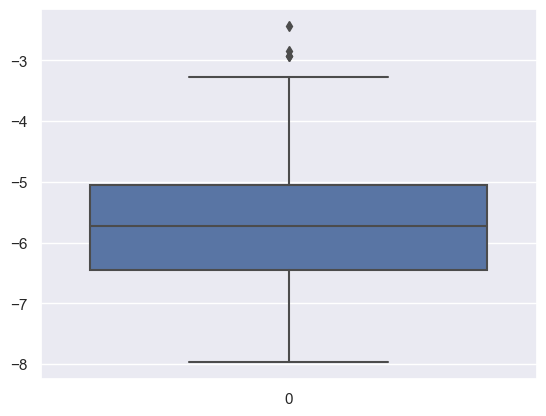

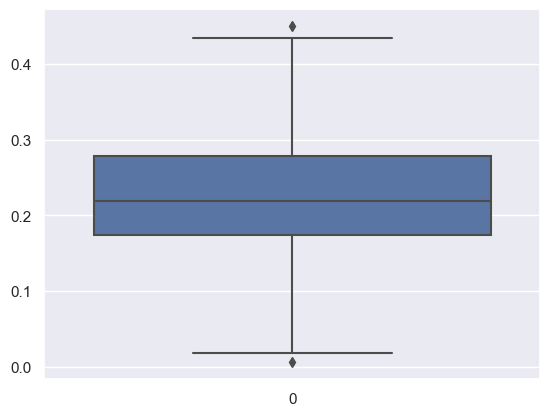

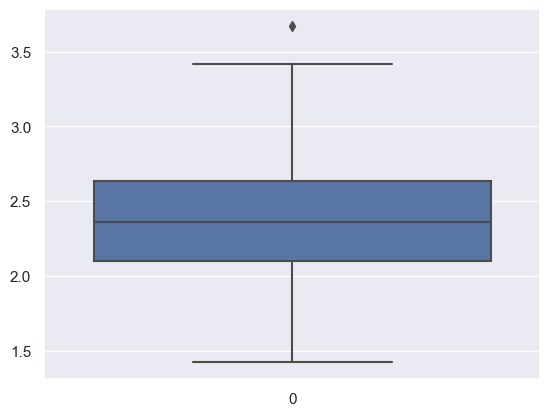

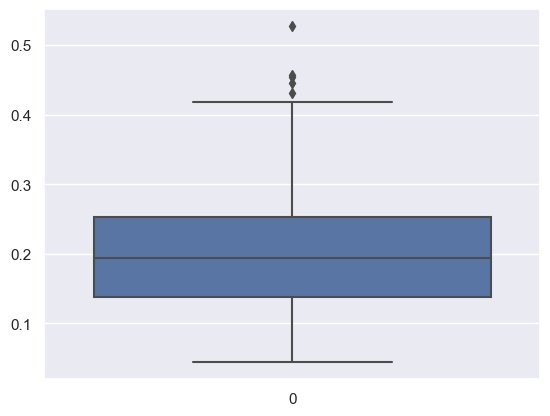

In [14]:
#Find the distribution of the data

def boxplots(col):
    sns.boxplot(df[col])
    plt.show()
    
for i in list(df.select_dtypes(exclude=['object']))[1:]:
    boxplots(i)

## Advance EDA - dtale

In [15]:
#D-TALE
!pip install dtale

In [16]:
import dtale
import dtale.app as dtale_app

In [17]:
##you should be thorough with stats

In [18]:
dtale.show(df)

## Pandas Profiling

In [19]:
#!pip install pandas-profiling

In [20]:
from pandas_profiling import ProfileReport
# prof = ProfileReport(df)
# prof.to_file(output_file='output.html')

2023-12-14 20:58:36,441 - INFO     - Pandas backend loaded 2.1.4
2023-12-14 20:58:36,457 - INFO     - Numpy backend loaded 1.24.3
2023-12-14 20:58:36,459 - INFO     - Pyspark backend NOT loaded
2023-12-14 20:58:36,459 - INFO     - Python backend loaded


In [21]:
#!pip install --upgrade pandas-profiling


In [22]:
#!pip install --upgrade pandas


In [23]:
#!pip install --upgrade --user pandas


In [24]:
import pandas as pd
print(pd.__version__)

2.1.4


In [25]:
#!pip install ydata_profiling

In [26]:
#pip install visions==0.7.4

In [27]:
#from ydata_profiling import ProfileReport

In [28]:
#how it worked?
#ran jupyter notebook as administrator
#upgraded pandas
from pandas_profiling import ProfileReport

In [29]:
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

In [30]:
df.duplicated().sum()

0

In [31]:
#name is an insignificant variable


In [32]:
#split the data into ind and dep variable
x=df.drop(['name','status'], axis=1)
y= df[['status']]

In [33]:
x.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [34]:
y.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [35]:
# Imbalance treatment required - Oversampling/ SMOTE

import imblearn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_ros,y_ros = ros.fit_resample(x,y)

In [36]:
#!pip install --upgrade imblearn

In [37]:
#!pip install --upgrade scikit-learn

In [38]:
#pip show imbalanced-learn


In [39]:
#worked after upgrading imblearn/imbalanced-learn, scikit-learn
#restarting the kernel


import imblearn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_ros,y_ros = ros.fit_resample(x,y)

In [40]:
pd.DataFrame(y_ros).value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

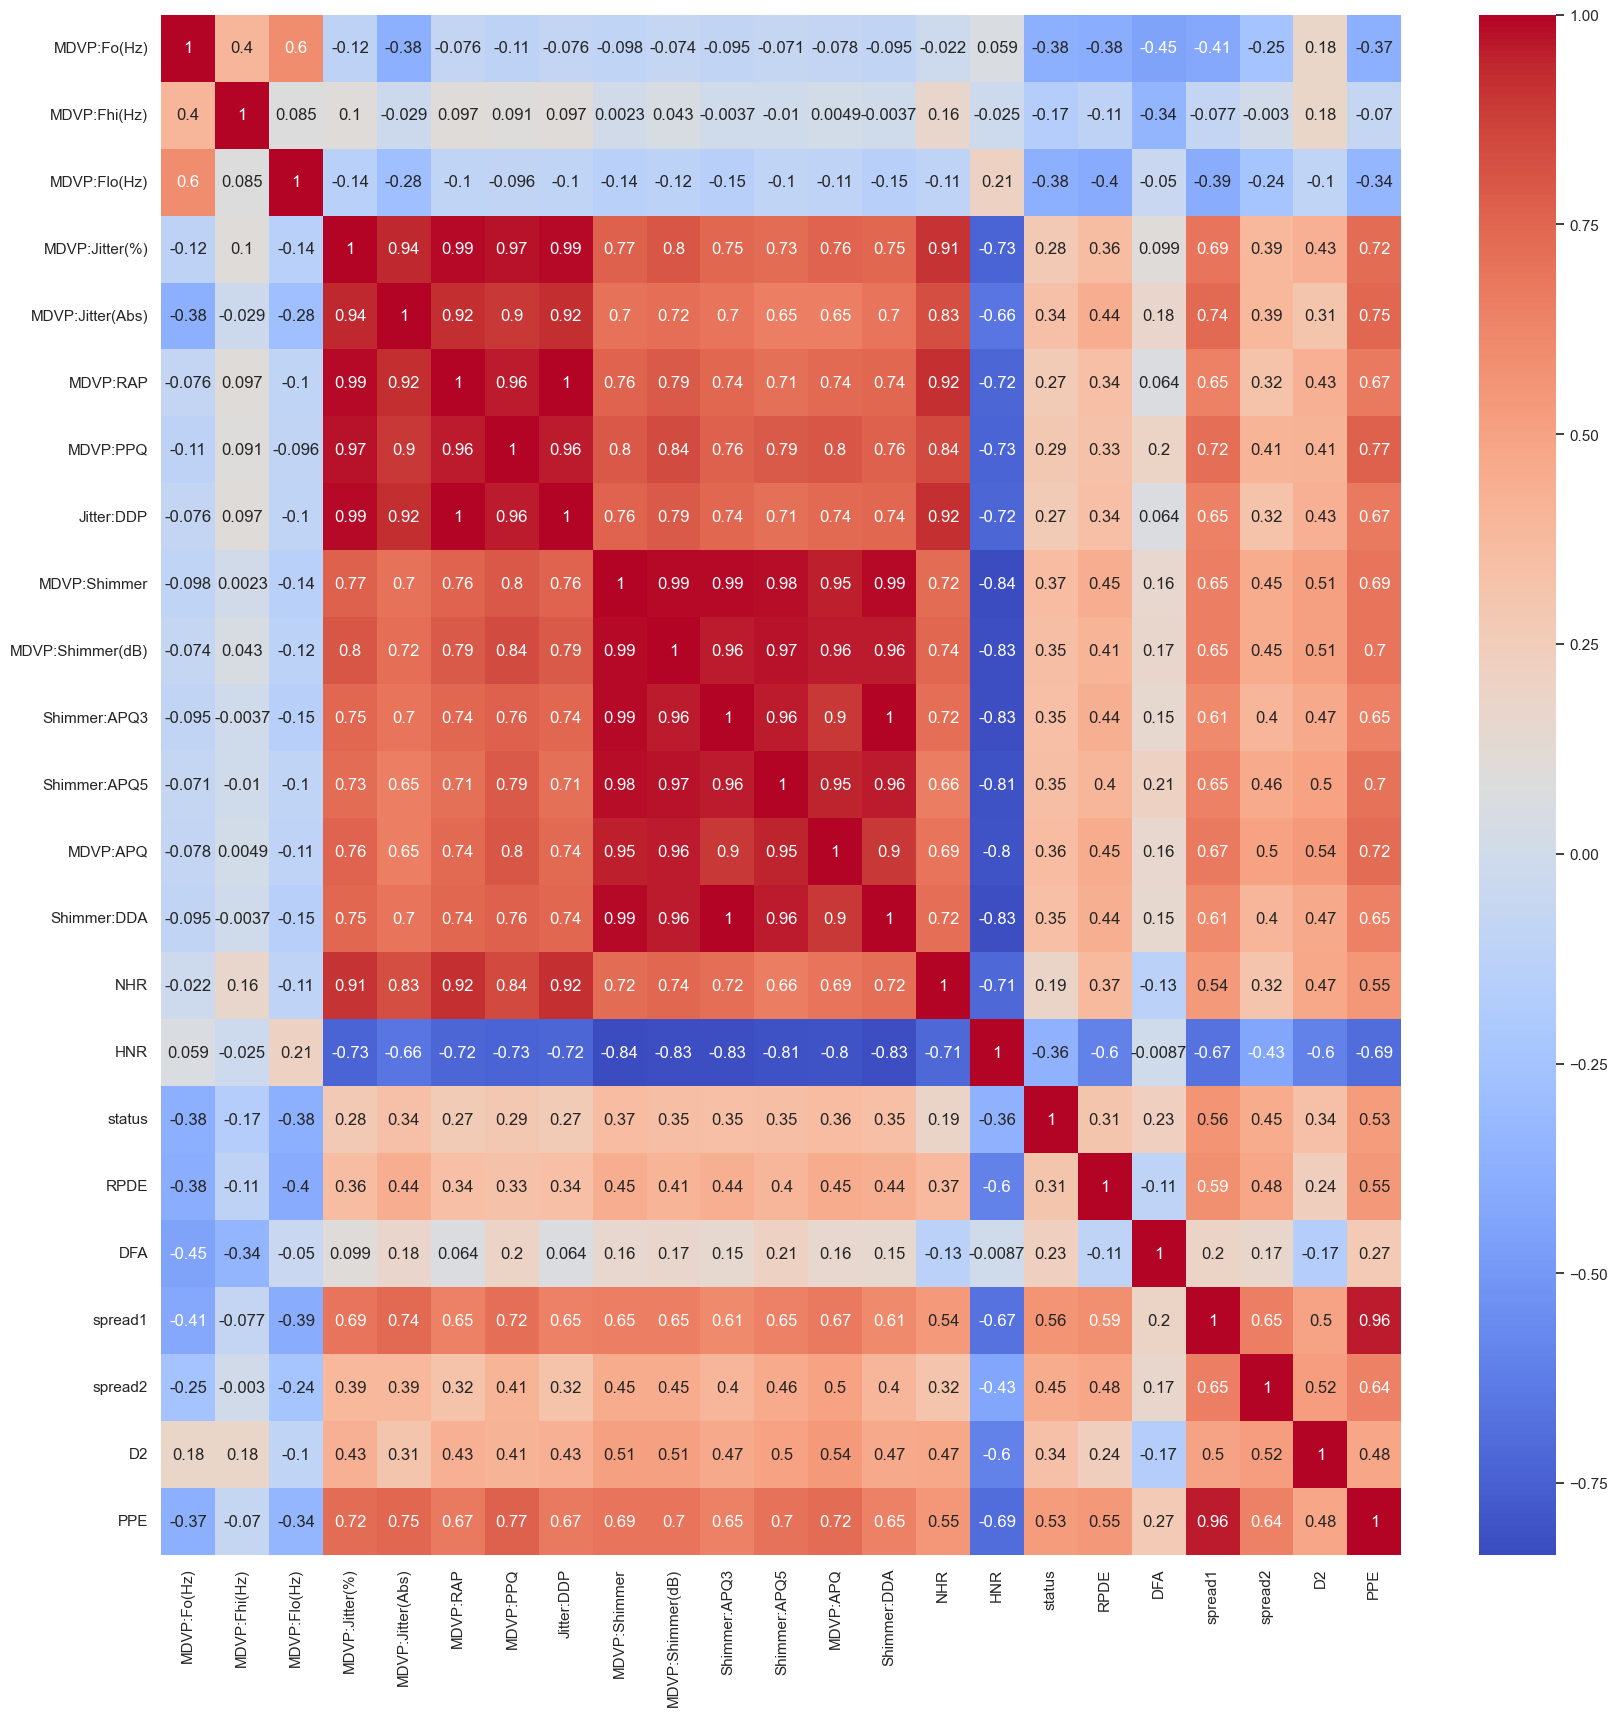

In [45]:
plt.figure(figsize=(20,20))
sns.heatmap(df.loc[:, df.columns != 'name'].corr(),annot=True,cmap='coolwarm') #first drop the name column
plt.show()

## Feature Scaling

In [ ]:
## why to do minmax?
### we can't do normalization because it will give value between 0-1, and we need outliers
### but standardization will give -3,3 
### in minmax we can provide our range

In [41]:
##minmaxscaler is standardization, but the range is provided by us

sc = MinMaxScaler((-1,1))
x = sc.fit_transform(x_ros)
y = y_ros

In [46]:
pd.DataFrame(x).shape

(294, 22)

## Feature Engineering to see what features needed

### PCA - Dimensionality reduction

In [48]:
from sklearn.decomposition import PCA

pca = PCA(0.95) #CONFIDENCE LEVEL: We are keeping those features who are coming within these 95 percent CL, rest we are ignoring
x_pca = pca.fit_transform(x)

print(pd.DataFrame(x).shape)
print(x_pca.shape)

(294, 22)
(294, 8)


In [ ]:
## we see earlier 22 features were there
## after doing pca, now only 8 features are important

In [50]:
# split the data into training and testing

from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x_pca, y, test_size=0.2, random_state=15)

## Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini', random_state=1)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [52]:
y_pred_train =rf.predict(x_train)
y_pred_test =rf.predict(x_test)

In [53]:
#Evaluate
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [55]:
print(confusion_matrix(y_train,y_pred_train))
print()
print(confusion_matrix(y_test,y_pred_test))

[[117   0]
 [  0 118]]

[[30  0]
 [ 1 28]]


In [56]:
print(classification_report(y_train,y_pred_train))
print()
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       117
           1       1.00      1.00      1.00       118

    accuracy                           1.00       235
   macro avg       1.00      1.00      1.00       235
weighted avg       1.00      1.00      1.00       235


              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.97      0.98        29

    accuracy                           0.98        59
   macro avg       0.98      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59



In [57]:
print(accuracy_score(y_train,y_pred_train))
print()
print(accuracy_score(y_test,y_pred_test))
#good accuracy because dataset very less,its overfitting, so do cross validation

1.0

0.9830508474576272


## Cross Validation

In [59]:
from sklearn.model_selection import cross_val_score
train_acc = cross_val_score(rf, x_train, y_train, cv=10)
test_acc = cross_val_score(rf, x_test, y_test, cv=10)


print("Train Mean Accuracy", train_acc.mean())
print('***************************')
print('Test Mean Accuracy', test_acc.mean())

Train Mean Accuracy 0.9442028985507246
***************************
Test Mean Accuracy 0.8833333333333332


## Now we are getting amazing result
## 10 percent variance difference is fine

# XGBoosting

In [63]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/bc/43/242432efc3f60052a4a534dc4926b21e236ab4ec8d4920c593da3f65c65d/xgboost-2.0.2-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 435.7 kB/s eta 0:03:49
   ---------------------------------------- 0.1/99.8 MB 744.7 kB/s eta 0:02:14
   ---------------------------------------- 0.2/99.8 MB 1.2 MB/s eta 0:01:21
   ---------------------------------------- 0.3/99.8 MB 1.6 MB/s eta 0:01:04
   ---------------------------------------- 0.5/99.8 MB 2.0 MB/s eta 0:00:49
   ---------------------------------------- 0.9/99.8 MB 2.9 MB/s eta 0:00:35
    --------------------------------------- 1.4/99.8 MB 4.2 MB/s eta 0:00:24
   - -------------------------------------- 2.5/99.8 MB 6.4 MB/s eta 0:00:16
   - ------------------------------

In [65]:
import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=1)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [67]:
y_pred_train_xgb =xgb.predict(x_train)
y_pred_test_xgb =xgb.predict(x_test)

In [68]:
print(classification_report(y_train,y_pred_train_xgb))
print()
print(classification_report(y_test,y_pred_test_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       117
           1       1.00      1.00      1.00       118

    accuracy                           1.00       235
   macro avg       1.00      1.00      1.00       235
weighted avg       1.00      1.00      1.00       235


              precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00      0.93      0.96        29

    accuracy                           0.97        59
   macro avg       0.97      0.97      0.97        59
weighted avg       0.97      0.97      0.97        59



In [69]:
print(accuracy_score(y_train,y_pred_train_xgb))
print()
print(accuracy_score(y_test,y_pred_test_xgb))

1.0

0.9661016949152542


In [70]:
#Cross validation
from sklearn.model_selection import cross_val_score
train_acc = cross_val_score(xgb, x_train, y_train, cv=10)
test_acc = cross_val_score(xgb, x_test, y_test, cv=10)


print("Train Mean Accuracy", train_acc.mean())
print('***************************')
print('Test Mean Accuracy', test_acc.mean())

Train Mean Accuracy 0.940036231884058
***************************
Test Mean Accuracy 0.8666666666666668


In [71]:
#high variance = overfitting
#high bias = underfitting

# bagging - RF - Handle overfitting (high varianace) and boosting - XGB - handle high bias(underfitting)